In this notebook, we'll participate in bike sharing demand competition hosted by Kaggle.
 
Go to https://www.kaggle.com/c/bike-sharing-demand/overview

and download bike-sharing-demand.zip (go to data and download all)

In [2]:
! ls *.zip

bike-sharing-demand.zip


In [3]:
! unzip bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: sampleSubmission.csv    


In [4]:
! cat train.csv

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.2,12.88,86,0,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0,1,7,8
2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0,8,6,14
2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36
2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56
2011-01-01 12:00:00,1,0,0,1,17.22,21.21,77,19.0012,29,55,84
2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94
2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106
2011-01-01 15:00:00,1,0,0,2,18.04,21.97,77,19.9995,40,70,110
2011-01-01 16:0

2012-07-08 16:00:00,3,0,0,2,32.8,40.15,66,15.0013,65,226,291
2012-07-08 17:00:00,3,0,0,1,31.98,37.12,59,0,68,202,270
2012-07-08 18:00:00,3,0,0,1,31.98,37.12,62,7.0015,54,199,253
2012-07-08 19:00:00,3,0,0,1,31.98,37.12,62,11.0014,66,184,250
2012-07-08 20:00:00,3,0,0,1,31.16,36.365,70,6.0032,79,206,285
2012-07-08 21:00:00,3,0,0,1,31.16,36.365,70,8.9981,58,149,207
2012-07-08 22:00:00,3,0,0,3,30.34,34.85,70,6.0032,12,110,122
2012-07-08 23:00:00,3,0,0,3,27.88,31.82,83,6.0032,25,98,123
2012-07-09 00:00:00,3,0,1,2,27.88,31.82,89,6.0032,6,33,39
2012-07-09 01:00:00,3,0,1,3,28.7,33.335,89,7.0015,5,13,18
2012-07-09 02:00:00,3,0,1,3,28.7,33.335,89,12.998,1,4,5
2012-07-09 03:00:00,3,0,1,3,28.7,33.335,89,12.998,0,5,5
2012-07-09 04:00:00,3,0,1,3,27.06,29.545,89,26.0027,1,1,2
2012-07-09 05:00:00,3,0,1,2,27.06,30.305,83,15.0013,1,27,28
2012-07-09 06:00:00,3,0,1,3,26.24,28.79,89,16.9979,6,86,92
2012-07-09 07:00:00,3,0,1,3,27.06,30.305,83,15.0013,7,223,230
2012-07-09 08:00:00,3,0,1,2,27.06,30.305,83,11.0

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
train_df = pd.read_csv('train.csv')
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
train_df.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [9]:
train_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [10]:
train_df.datetime = pd.to_datetime(train_df.datetime)
train_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [15]:
def engineered_time_feature(df):
    df['month'] = df.datetime.dt.month
    df['year'] = df.datetime.dt.year
    df['day'] = df.datetime.dt.day
    df['day_of_the_week'] = df.datetime.dt.dayofweek
    return df


In [16]:
test_df = pd.read_csv('test.csv')


In [17]:
test_df.datetime= pd.to_datetime(test_df.datetime)
test_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [18]:
test_df = engineered_time_feature(test_df)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,year,day,day_of_the_week
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,2011,20,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,3


In [14]:
eg

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'microsecond',
 'minute',
 'month',
 'month_name',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 't

In [13]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,day,day_of_the_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,1,5


In [19]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,day,day_of_the_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,1,5


In [20]:
train_df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,day,day_of_the_week
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.971524,-0.004797,0.001729,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.001731,0.012021,-0.015877,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.003394,-0.002482,0.009829,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,0.012144,-0.012548,-0.007890,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.257589,0.061226,0.015551,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.264173,0.058540,0.011866,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.204537,-0.078606,-0.011335,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.150192,-0.015221,0.036157,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722,0.145241,0.014109,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451,0.264265,0.019111,-0.084427


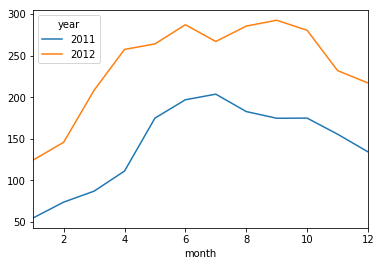

In [31]:
train_df.groupby(['year', 'month'])['count'].mean().unstack(level=0).plot()

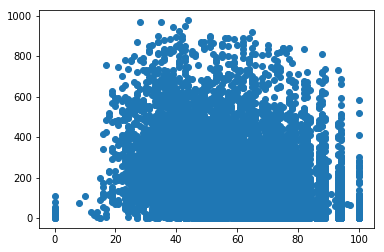

In [33]:
plt.scatter(train_df.humidity, train_df['count'])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_set_df, val_set_df = train_test_split(train_df, test_size = .2, random_state= 1)

In [36]:
train_set_df.shape, val_set_df.shape

((8708, 16), (2178, 16))

In [37]:
train_set_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,day,day_of_the_week
3224,2011-08-04 06:00:00,3,0,1,2,27.88,31.820,89,19.9995,7,90,97,8,2011,4,3
1299,2011-03-19 00:00:00,1,0,0,2,24.60,31.060,53,16.9979,26,50,76,3,2011,19,5
3489,2011-08-15 07:00:00,3,0,1,1,24.60,27.275,88,16.9979,10,248,258,8,2011,15,0
7649,2012-05-18 02:00:00,2,0,1,1,19.68,23.485,67,8.9981,12,9,21,5,2012,18,4
5950,2012-02-04 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,17,18,2,2012,4,5


In [39]:
X_train= train_set_df.drop(['datetime', 'casual', 'registered', 'count'], axis =1)
y_train = train_set_df['count']
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,year,day,day_of_the_week
3224,3,0,1,2,27.88,31.820,89,19.9995,8,2011,4,3
1299,1,0,0,2,24.60,31.060,53,16.9979,3,2011,19,5
3489,3,0,1,1,24.60,27.275,88,16.9979,8,2011,15,0
7649,2,0,1,1,19.68,23.485,67,8.9981,5,2012,18,4
5950,1,0,0,1,9.84,14.395,75,0.0000,2,2012,4,5


In [40]:
X_val= val_set_df.drop(['datetime', 'casual', 'registered', 'count'], axis =1)
y_val = val_set_df['count']

In [41]:
! pip install xgboost

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [42]:
import xgboost as xgb

In [43]:
xgb_reg= xgb.XGBRegressor(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)
xgb_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.7, verbosity=1)

In [44]:
xgb_reg.fit(X_train, y_train, eval_set= [(X_train, y_train), (X_val, y_val)])

/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:243.361	validation_1-rmse:251.961
[1]	validation_0-rmse:227.814	validation_1-rmse:236.468
[2]	validation_0-rmse:213.877	validation_1-rmse:222.271
[3]	validation_0-rmse:201.829	validation_1-rmse:210.251
[4]	validation_0-rmse:191.271	validation_1-rmse:199.415
[5]	validation_0-rmse:182.389	validation_1-rmse:190.47
[6]	validation_0-rmse:174.454	validation_1-rmse:182.557
[7]	validation_0-rmse:167.849	validation_1-rmse:176.041
[8]	validation_0-rmse:162.27	validation_1-rmse:170.615
[9]	validation_0-rmse:157.384	validation_1-rmse:166.018
[10]	validation_0-rmse:153.144	validation_1-rmse:161.801
[11]	validation_0-rmse:149.534	validation_1-rmse:158.393
[12]	validation_0-rmse:146.58	validation_1-rmse:155.584
[13]	validation_0-rmse:143.928	validation_1-rmse:152.998
[14]	validation_0-rmse:141.65	validation_1-rmse:150.908
[15]	validation_0-rmse:139.721	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.7, verbosity=1)

In [45]:
results= xgb_reg.evals_result()
results

{'validation_0': {'rmse': [243.361115,
   227.814209,
   213.877243,
   201.829071,
   191.270828,
   182.388641,
   174.453506,
   167.849304,
   162.270233,
   157.384476,
   153.144272,
   149.534454,
   146.580048,
   143.927811,
   141.649796,
   139.720596,
   137.953476,
   136.403458,
   135.11792,
   133.841522,
   132.731506,
   131.81871,
   131.106522,
   130.399658,
   129.857513,
   129.18782,
   128.710663,
   128.164597,
   127.794983,
   127.376404,
   126.925369,
   126.555862,
   126.332092,
   125.945015,
   125.704422,
   125.423027,
   125.163673,
   124.829338,
   124.550171,
   124.355606,
   123.973495,
   123.484337,
   123.142105,
   122.89724,
   122.679115,
   122.385071,
   122.113609,
   121.785439,
   121.522842,
   121.376053,
   121.10675,
   120.874962,
   120.534554,
   120.25106,
   120.041229,
   119.711655,
   119.530083,
   119.190941,
   118.994011,
   118.692459,
   118.450722,
   118.211952,
   118.004021,
   117.782906,
   117.673553,
   117.

In [47]:
n_iter = len(results['validation_0']['rmse'])
n_iter

100

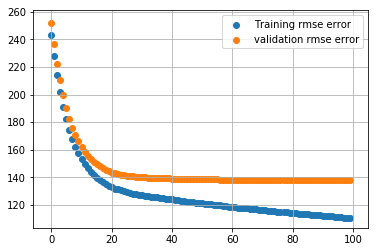

In [48]:
plt.scatter(list(range(n_iter)),  results['validation_0']['rmse'], label= 'Training rmse error')
plt.scatter(list(range(n_iter)),  results['validation_1']['rmse'], label= 'validation rmse error')
plt.grid(True)
plt.legend()

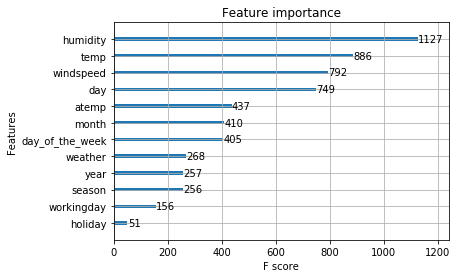

In [49]:
xgb.plot_importance(xgb_reg)

In [50]:
y_pred = xgb_reg.predict(X_train)

In [57]:
y_pred[y_pred<0] = 0

In [56]:
y_pred<0

array([False, False, False, ..., False, False, False])

In [51]:
def kaggle_metric_evaluation(y_true, y_pred):
    return (np.mean((np.log1p(y_true) - np.log1p(y_pred))**2, axis =0))**.5

In [58]:
kaggle_metric_evaluation(y_train, y_pred)

1.1346928872122686

In [59]:
test_df.head() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,year,day,day_of_the_week
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,2011,20,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,3


In [61]:
X_test = test_df.drop('datetime', axis =1)
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,year,day,day_of_the_week
0,1,0,1,1,10.66,11.365,56,26.0027,1,2011,20,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,3
2,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,3
3,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,3


In [69]:
test_df['count']= xgb_reg.predict(X_test)

ValueError: feature_names mismatch: ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'year', 'day', 'day_of_the_week'] ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'year', 'day', 'day_of_the_week', 'count']
training data did not have the following fields: count

In [67]:
X_test['count'] = X_test['count'].map(lambda x: x if x >0 else 0)


In [68]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,year,day,day_of_the_week,count
0,1,0,1,1,10.66,11.365,56,26.0027,1,2011,20,3,99.445305
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,3,40.285812
2,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,3,40.285812
3,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,3,64.803307
4,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,3,64.803307


In [70]:
test_df['count'] = X_test['count']

In [71]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,year,day,day_of_the_week,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,2011,20,3,99.445305
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,3,40.285812
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,3,40.285812
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,3,64.803307
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,3,64.803307


In [73]:
test_df[['datetime', 'count']].to_csv('test_predcited.csv', index= False)

In [74]:
! cat test_predcited.csv

datetime,count
2011-01-20 00:00:00,99.44530487060547
2011-01-20 01:00:00,40.28581237792969
2011-01-20 02:00:00,40.28581237792969
2011-01-20 03:00:00,64.80330657958984
2011-01-20 04:00:00,64.80330657958984
2011-01-20 05:00:00,76.43345642089844
2011-01-20 06:00:00,69.75880432128906
2011-01-20 07:00:00,59.075782775878906
2011-01-20 08:00:00,56.204891204833984
2011-01-20 09:00:00,74.71826934814453
2011-01-20 10:00:00,65.61804962158203
2011-01-20 11:00:00,79.03948211669922
2011-01-20 12:00:00,74.20342254638672
2011-01-20 13:00:00,74.71959686279297
2011-01-20 14:00:00,86.50513458251953
2011-01-20 15:00:00,103.84544372558594
2011-01-20 16:00:00,67.60975646972656
2011-01-20 17:00:00,62.94710159301758
2011-01-20 18:00:00,76.5526123046875
2011-01-20 19:00:00,93.63105773925781
2011-01-20 20:00:00,94.28076171875
2011-01-20 21:00:00,96.03324127197266
2011-01-20 22:00:00,64.49495697021484
2011-01-20 23:00:00,62.17499542236328
2011-01-21 00:00:00,62.39170455932617
2011-01-21 01:00:00,62.3917045593261